In [2]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
import warnings
from sklearn.metrics import confusion_matrix
from sklearn import metrics
df=pd.read_csv("studentdata.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

In [3]:
df.shape

(480, 17)

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

**DATA VISUALIZATION**


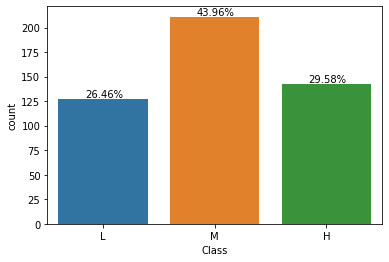

In [7]:
ax = sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(df)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

Majority of students in dataset have show medium level performance




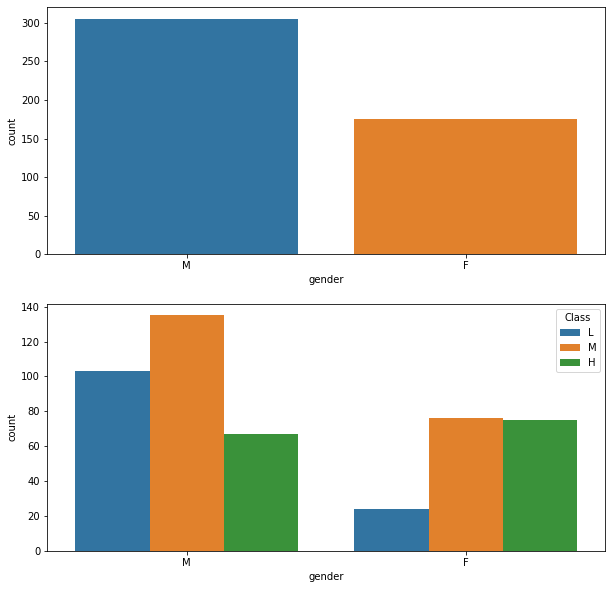

In [8]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='gender', data=df, order=['M','F'], ax=axarr[0])
sns.countplot(x='gender', hue='Class', data=df, order=['M', 'F'],hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

There are more male students in the dataset than female students.

Most male students show medium performance.

Female students consist of almost equal number of medium and high performers

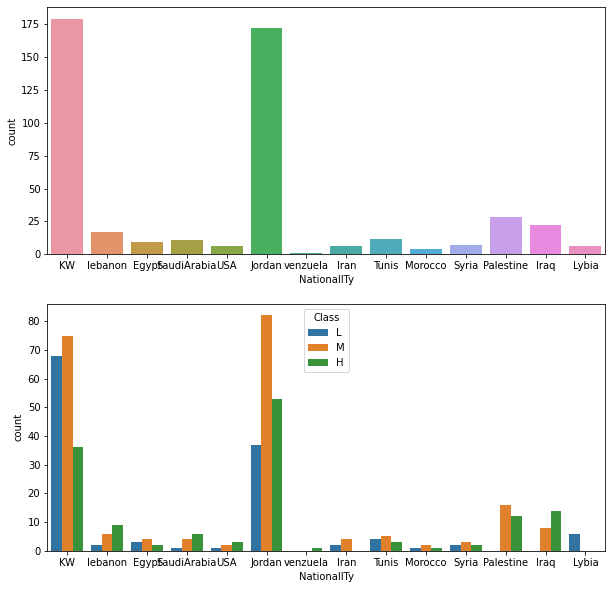

In [9]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='NationalITy', data=df, ax=axarr[0])
sns.countplot(x='NationalITy', hue='Class', data=df,hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

Majority of survey responders belong to Kuwait and Jordan.

Palestine and Iraq reported no low performers.

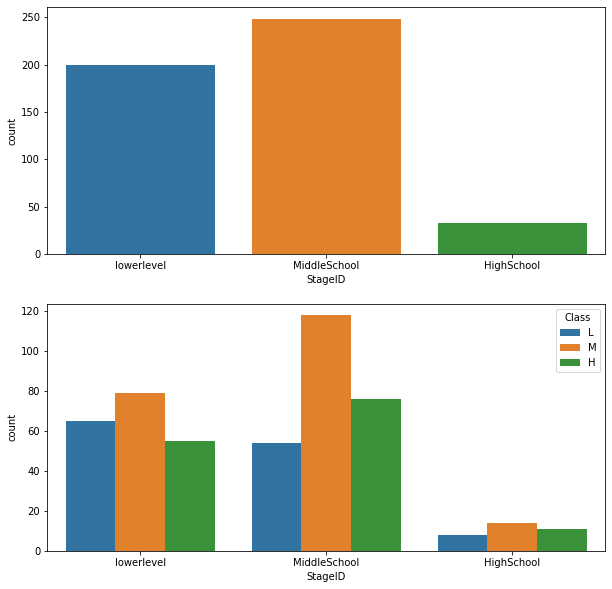

In [10]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StageID', data=df, ax=axarr[0])
sns.countplot(x='StageID', hue='Class', data=df, hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

Most students in the dataset belong to lower level or middle school, proportion of high school students is comparitively less.

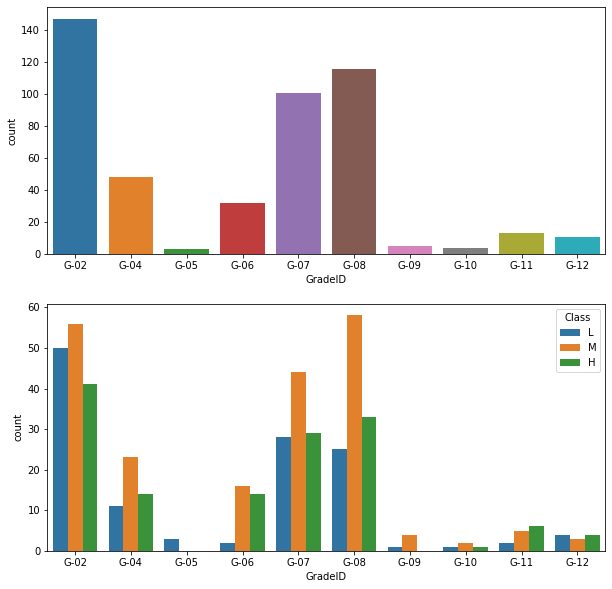

In [11]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='GradeID', data=df, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], ax=axarr[0])
sns.countplot(x='GradeID', hue='Class', data=df, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

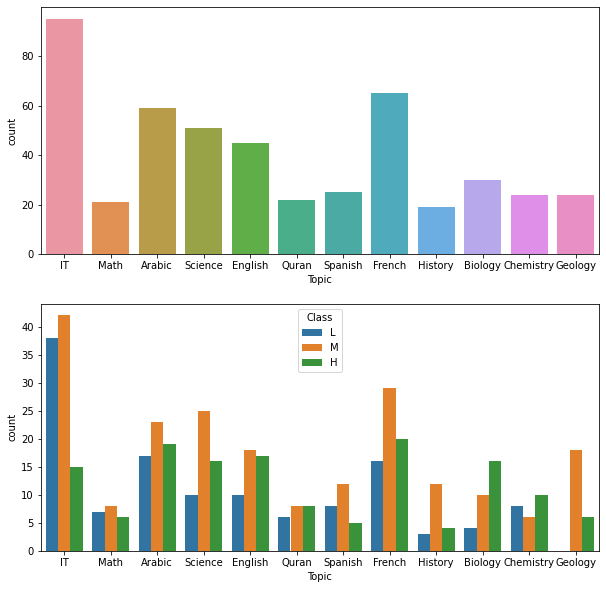

In [12]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Topic', data=df, ax = axarr[0])
sns.countplot(x='Topic', hue='Class', data=df,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

No geology students in the dataset show low performance.

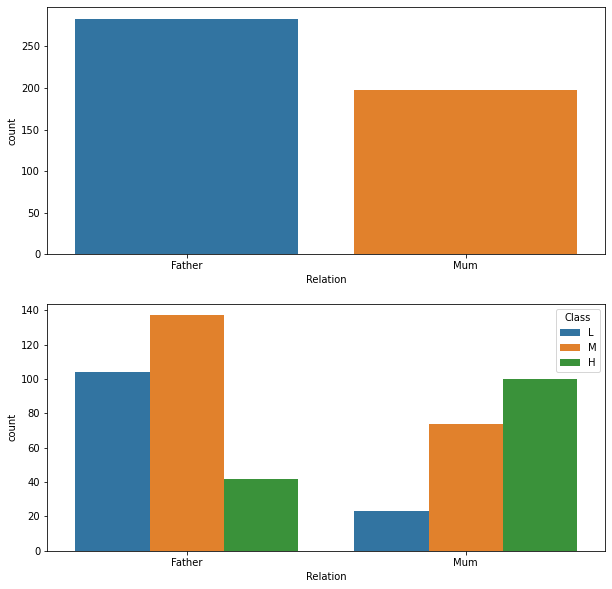

In [13]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Relation', data=df, ax = axarr[0])
sns.countplot(x='Relation', hue='Class', data=df,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

More fathers responded to the survey than mothers.

However there are more high performers among students whose mothers responded to the survey.

This could possibly reveal a correlation between mothers involvement in child's education and performance level. 

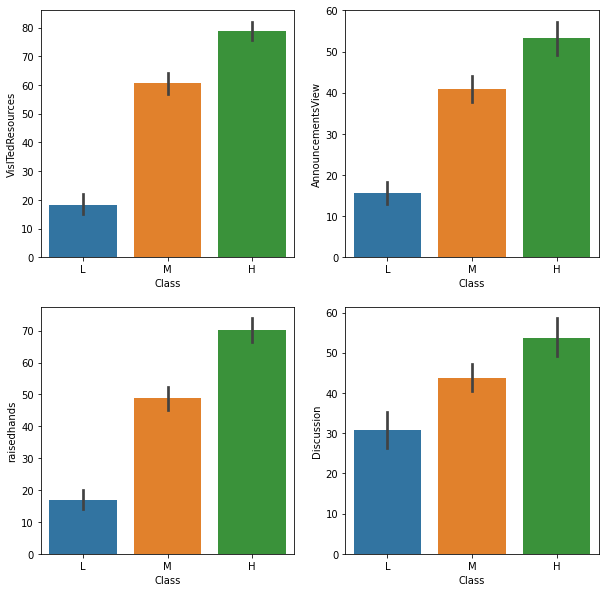

In [14]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

In [15]:
df.groupby('Topic').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.0,65.0,41.0,38.0
Biology,78.5,88.5,54.0,47.0
Chemistry,79.0,84.5,47.0,30.5
English,55.0,50.0,33.0,36.0
French,35.0,80.0,23.0,21.0
Geology,80.0,82.0,68.5,60.5
History,69.0,84.0,72.0,65.0
IT,20.0,25.0,10.0,40.0
Math,28.0,15.0,19.0,40.0


Geology students have high median values for participation attributes, this could explain why no geology performed poorly.

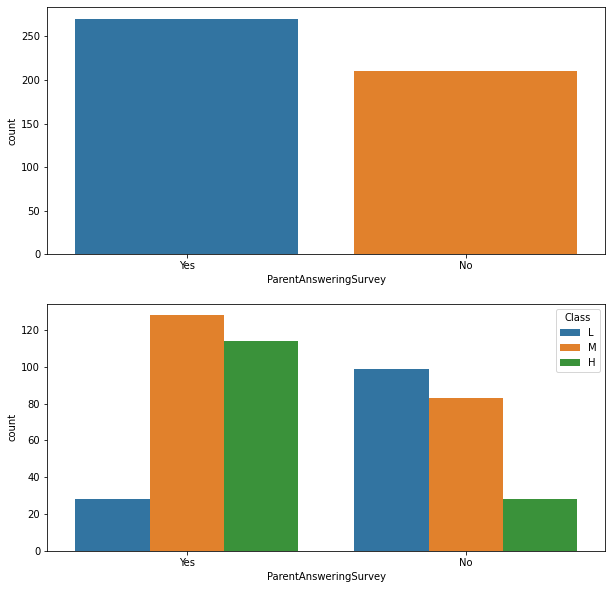

In [16]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentAnsweringSurvey', data=df, order=['Yes', 'No'], ax = axarr[0])
sns.countplot(x='ParentAnsweringSurvey', hue='Class', data=df, order=['Yes', 'No'], hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

There are lesser low performers among students whose parents answered the survey.

This again suggest some relation between parent's participation and student's performance.

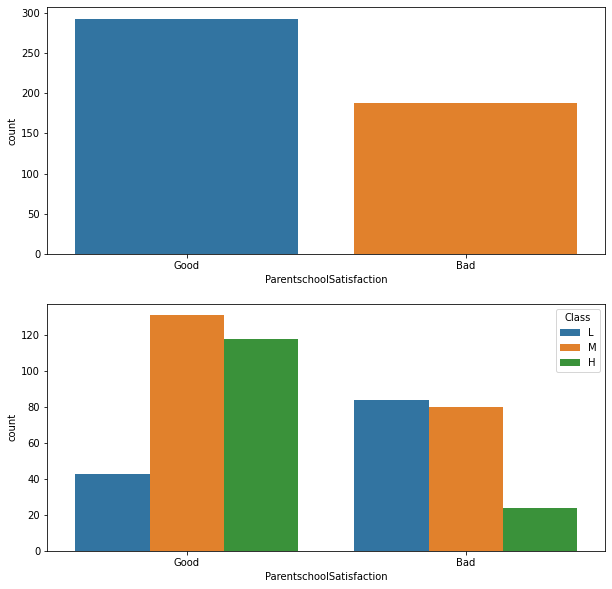

In [17]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentschoolSatisfaction', data=df, order=['Good', 'Bad'], ax = axarr[0])
sns.countplot(x='ParentschoolSatisfaction', hue='Class', data=df, order=['Good', 'Bad'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

The children of parents who were satisfied with school performed better.

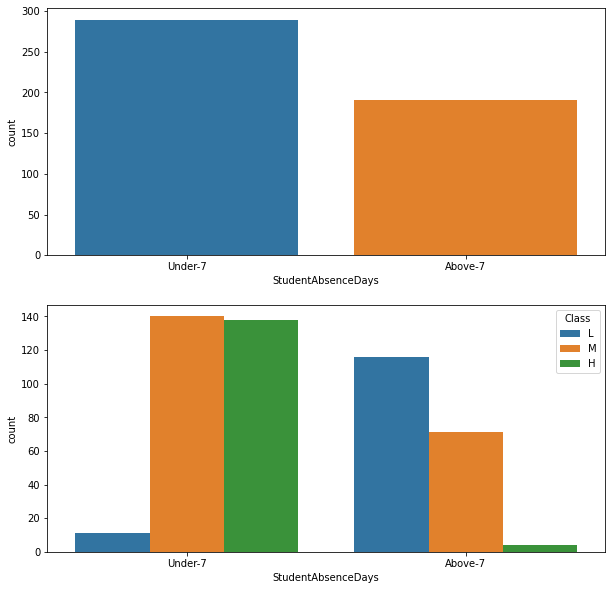

In [18]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StudentAbsenceDays', data=df, order=['Under-7', 'Above-7'], ax = axarr[0])
sns.countplot(x='StudentAbsenceDays', hue='Class', data=df, order=['Under-7', 'Above-7'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

Very few students who were absent for more than 7 days were able to perform well.

**DATA PRE-PROCESSING**

In [19]:

class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
df = df.replace({"Class" : class_dict})

In [20]:
from sklearn import preprocessing, svm 
df["raisedhands"] = preprocessing.scale(df["raisedhands"])
df["VisITedResources"] = preprocessing.scale(df["VisITedResources"])
df["AnnouncementsView"] = preprocessing.scale(df["AnnouncementsView"])
df["Discussion"] = preprocessing.scale(df["Discussion"])
df = pd.get_dummies(df, columns=["gender",
                                  "Semester",
                                  "Relation",
                                  "ParentAnsweringSurvey",
                                  "ParentschoolSatisfaction",
                                  "StudentAbsenceDays"])

In [21]:
df.head()

,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,KW,KuwaIT,lowerlevel,G-04,A,IT,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,1,0,1,0,0,1,0,1,0,1
1,KW,KuwaIT,lowerlevel,G-04,A,IT,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,1,0,1,0,0,1,0,1,0,1
2,KW,KuwaIT,lowerlevel,G-04,A,IT,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,1,0,1,0,1,0,1,0,1,0
3,KW,KuwaIT,lowerlevel,G-04,A,IT,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,1,0,1,0,1,0,1,0,1,0
4,KW,KuwaIT,lowerlevel,G-04,A,IT,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,1,0,1,0,1,0,1,0,1,0


In [22]:
df = df.drop(['NationalITy','PlaceofBirth','SectionID','StageID','Topic','GradeID'],axis = 1)

In [23]:
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,1,0,1,0,0,1,0,1,0,1
1,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,1,0,1,0,0,1,0,1,0,1
2,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,1,0,1,0,1,0,1,0,1,0
3,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,1,0,1,0,1,0,1,0,1,0
4,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,1,0,1,0,1,0,1,0,1,0


In [24]:
X = df.drop('Class',axis = 1)
y = df['Class']


In [25]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,0,1,1,0,1,0,0,1,0,1,0,1
1,-0.870813,-1.053029,-1.313549,-0.662225,0,1,1,0,1,0,0,1,0,1,0,1
2,-1.196046,-1.446426,-1.426401,-0.481125,0,1,1,0,1,0,1,0,1,0,1,0
3,-0.545579,-0.901723,-1.238315,-0.300024,0,1,1,0,1,0,1,0,1,0,1,0
4,-0.220346,-0.145191,-0.974994,0.243279,0,1,1,0,1,0,1,0,1,0,1,0


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**DECISION TREE**

In [28]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(random_state=0)
result = DTree.fit(X_train,y_train)

In [29]:
DT_predictions = result.predict(X_test)
DT_predictions

array([ 0, -1, -1,  0,  0,  0,  1, -1, -1,  0,  1,  0,  1, -1,  0,  0,  1,
       -1,  0,  1, -1,  1,  0,  0,  0,  1,  1,  0,  0, -1,  0, -1,  1,  0,
        1,  0,  1,  1,  0, -1,  0,  0,  1,  1,  0,  0,  1,  0, -1, -1,  0,
       -1,  1, -1,  1,  0, -1, -1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,
       -1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,  1,  0,  0, -1, -1,
        1,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0])

In [57]:
dt_score=accuracy_score(y_test,DT_predictions)
dt_score

0.71875

In [32]:
conf_matrix =confusion_matrix(DT_predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['high','middle','low'], columns=['high','middle','low'])
confusion_df

,high,middle,low
high,22,3,1
middle,1,29,9
low,0,13,18


In [31]:

print('\n**Classification Report:\n',metrics.classification_report(y_test,DT_predictions))


**Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.96      0.90        23
           0       0.74      0.64      0.69        45
           1       0.58      0.64      0.61        28

    accuracy                           0.72        96
   macro avg       0.72      0.75      0.73        96
weighted avg       0.72      0.72      0.72        96



**RANDOM FOREST**

In [33]:
from sklearn.ensemble import RandomForestClassifier
my_model3 = RandomForestClassifier()
RF_result=my_model3.fit(X_train, y_train)

In [34]:
RF_predictions = RF_result.predict(X_test)
RF_predictions

array([ 0, -1, -1,  0,  0,  0,  1, -1, -1,  0,  1,  0,  1, -1,  0,  0,  1,
       -1,  0,  1, -1,  1,  0,  0,  0,  1,  1,  0,  0, -1,  0, -1,  1,  0,
        1,  0,  1,  1,  0,  0,  0, -1,  1,  1,  1,  0,  1,  0, -1, -1,  0,
        0,  1, -1,  1,  0, -1, -1,  1,  1,  0,  0,  1,  0,  1,  0, -1,  1,
       -1, -1, -1, -1,  1, -1,  1, -1,  0, -1,  0, -1,  1,  0,  0, -1, -1,
        1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0])

In [64]:

rf_score=metrics.accuracy_score(y_test, RF_predictions)
rf_score

0.75

In [36]:

conf_matrix =confusion_matrix(RF_predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['high','middle','low'], columns=['high','middle','low'])
confusion_df

,high,middle,low
high,23,3,0
middle,0,30,9
low,0,12,19


In [37]:

print('\n**Classification Report:\n',metrics.classification_report(y_test,RF_predictions))


**Classification Report:
               precision    recall  f1-score   support

          -1       0.88      1.00      0.94        23
           0       0.77      0.67      0.71        45
           1       0.61      0.68      0.64        28

    accuracy                           0.75        96
   macro avg       0.76      0.78      0.77        96
weighted avg       0.75      0.75      0.75        96



**NAIVE BAYES**

In [38]:
from sklearn.naive_bayes import GaussianNB
NB_clf=GaussianNB()
NB_result=NB_clf.fit(X_train,y_train)

In [52]:
NB_prediction=NB_result.predict(X_test)
NB_prediction

array([ 0,  0, -1,  0,  1,  0,  1, -1, -1,  0,  1,  0,  1, -1,  0,  0,  1,
       -1, -1,  1, -1,  0,  0,  1,  0,  1,  1,  0,  0, -1,  0, -1,  1,  0,
        1,  0,  1,  1,  0,  0,  1, -1,  1,  1,  1,  0,  1,  1, -1, -1,  0,
        0,  1, -1,  1,  0, -1, -1,  1,  0,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  0, -1,  1,  0,  1, -1, -1,
        1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1])

In [53]:
nb_score=metrics.accuracy_score(y_test,NB_prediction)
nb_score

0.7395833333333334

In [55]:
cf=confusion_matrix(y_test,NB_prediction)
confusion_df = pd.DataFrame(cf, index=['high','middle','low'], columns=['high','middle','low'])
confusion_df

,high,middle,low
high,22,1,0
middle,4,25,16
low,0,4,24


In [56]:

print('\n**Classification Report:\n',metrics.classification_report(y_test,NB_prediction))


**Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.96      0.90        23
           0       0.83      0.56      0.67        45
           1       0.60      0.86      0.71        28

    accuracy                           0.74        96
   macro avg       0.76      0.79      0.76        96
weighted avg       0.77      0.74      0.73        96



**KNN**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN_result = KNN.fit(X_train,y_train)

In [45]:
KNN_predictions = KNN_result.predict(X_test)
KNN_predictions

array([ 0, -1, -1,  0,  0,  0,  1, -1, -1, -1,  1, -1,  0, -1,  0,  0,  1,
       -1,  0,  1, -1,  0,  0,  0,  0,  1,  1,  0,  0, -1,  0, -1,  1,  0,
        1,  0,  0,  1,  0,  0,  0, -1,  0,  1,  1, -1,  1,  1, -1,  0,  0,
        0,  1, -1,  0,  0, -1, -1,  1,  0,  0,  1,  1,  0,  0,  1, -1,  0,
       -1, -1, -1, -1,  1, -1,  0, -1,  0, -1,  0, -1,  1,  0,  1, -1, -1,
        1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0])

In [62]:
knn_score=metrics.accuracy_score(y_test, KNN_predictions)
knn_score

0.6979166666666666

In [60]:
cm = confusion_matrix(y_test, KNN_predictions)
confusion_df = pd.DataFrame(cm, index=['high','middle','low'], columns=['high','middle','low'])
confusion_df

,high,middle,low
high,22,1,0
middle,6,29,10
low,0,12,16


In [61]:
print('\n**Classification Report:\n',metrics.classification_report(y_test,KNN_predictions))


**Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.96      0.86        23
           0       0.69      0.64      0.67        45
           1       0.62      0.57      0.59        28

    accuracy                           0.70        96
   macro avg       0.70      0.72      0.71        96
weighted avg       0.69      0.70      0.69        96



**COMPARISION**

In [58]:
print("Decision tree algorithm accuracy :",dt_score)


Decision tree algorithm accuracy : 0.71875


In [65]:
print("Random Forest algorithm accuracy :",rf_score)


Random Forest algorithm accuracy : 0.75


In [59]:
print("Naive Bayes accuracy :",nb_score)


Naive Bayes accuracy : 0.7395833333333334


In [63]:
print("KNN accuracy :",knn_score)


KNN accuracy : 0.6979166666666666
